# Part I Logistic Regression & Ensemble Methods

## Question One:

### The cross-entropy loss function
Weneed a loss function that expresses, for an observation x, how close the classifier output ($\hat{y}$ = σ(w·x+b)) is to the correct output (y, which is 0 or 1). We’ll call this:
L($\hat{y}$,y) = How much $\hat{y}$ differs from the true y

We do this via a loss function that prefers the correct class labels of the training examples to be more likely. This is called conditional maximum likelihood estimation:

We choose the parameters w,b that maximize the log probability of the true y labels in the training data given the observations x. The resulting loss function is the negative log likelihood loss, generally called the cross-entropy loss. Let’s derive this loss function, applied to a single observation x. We’d like to learn weights that maximize the probability of the correct label p(y|x). Since there are only two discrete outcomes (1 or 0), this is a Bernoulli distribution, and we can express the probability p(y|x) that our classifier produces for one observation as the following

$$p(y|x) = \hat{y}^y (1 - \hat{y})^{1-y}$$

Now we take the log of both sides. This will turn out to be handy mathematically, and doesn’t hurt us; whatever values maximize a probability will also maximize the log of the probability:

$$
\begin{align*}
    \log p(y|x) &= \log \left( \hat{y}^y (1 - \hat{y})^{1-y} \right)       \qquad (1)      \\       
    L_{CE}(\hat{y}, y) &= -\log p(y|x) = -\left[ y \log \hat{y} + (1 - y) \log(1 - \hat{y}) \right] \\
    L(\hat{y}, y) &= - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right] \\
    L_{CE}(\hat{y}, y) &= -\left[ y \log \sigma(w \cdot x + b) + (1 - y) \log(1 - \sigma(w \cdot x + b)) \right]
\end{align*} $$


This loss function also ensures that as the probability of the correct answer is maximized, the probability of the incorrect answer is minimized; since the two sum to one, any increase in the probability of the correct answer is coming at the expense of the incorrect answer. It’s called the crossentropy loss, because Eq. (1) is also the formula for the cross-entropy between the true probability distribution y and our estimated distribution  $\hat{y}$.

## Question Two: 
### Voting Classifier
Ensemble methods in machine learning involve combining multiple classifiers to improve the accuracy of predictions.

#### Ensemble Classifiers
The traditional approach in machine learning is to train one classifier using available data.

In traditional machine learning, a single classifier is trained on available data. However, each classifier family has assumptions about the data, and its performance depends on how well these assumptions are met. Additionally, training a model from the same classification family on different subsets of data can result in models of varying performance.

To address this issue, we can train multiple classifiers and combine their outputs when classifying new objects. This usually improves performance but at the cost of increased processing time.


###### Hard Voting
Let $f_1$, $f_2$, $\ldots$, $f_n$ be the various classifiers we trained using the same dataset or different subsets thereof. Each f_i returns a class label when we feed it a new object x.

In hard voting, we combine the outputs by returning the mode, i.e., the most frequently occurring label among the base classifiers’ outputs.

For example, if $n=3$ and $f_1(x)=1$, $f_2(x)=1$, and $f_3(x)=0$, the hard-voting outputs 1 as it’s the mode.

The final output doesn’t need to be the majority label. In multiple classification problems, it can happen that no label achieves the majority.

##### Soft Voting
In soft voting, the base classifiers output probabilities or numerical scores.

##### Conclusion
Hard-voting ensembles output the mode of the base classifiers’ predictions, whereas soft-voting ensembles average predicted probabilities (or scores).



# Part II Supervised Machine Learning- Support Vector Classification

## Problem Statement  

The task at hand is to predict the short-term trend of Invesco QQQ Trust (QQQ) ETF, specifically focusing on binary classification using a supervised machine learning model, namely Support Vector Machine (SVM). Short-term asset return prediction is a complex task due to the efficient market hypothesis, which suggests that daily returns follow a nearly Normal distribution and exhibit no significant correlation between consecutive days' returns ($r_t$ and $r_{t-1}$).

To simplify the problem, we will categorize the trend as either an upward or downward movement, assigning the target variable values of 0 and 1, respectively. The objective is to train an SVM model that can accurately predict the next-day trend based on historical data and relevant features.

By employing SVM, we aim to capture patterns and relationships in the historical data that can assist in predicting the direction of the short-term trend.

# Support Vector Machine

Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model developed in the 1990s and is capable of performing linear or nonlinear classification, regression, and even outlier detection. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

### Maximimal Margin Classifier

**Hard margin:**

SVM uses a separating hyperplane in multidimensional space to perform a task. In a p dimensional space, a hyperplane is a flat subspace with p-1 dimensions. For example, In 2D, a hyperplane is a flat 1D subspace or a line. In a 3D, a hyperplane is a flat 2D subspace which is, a plane. If the dimensionality is greater than 3, it can be hard to visualize a hyperplane, but the notion of a p-1 dimensional space still applies.

The hyperplane resulting in the largest margin can be solved by

$\min_{\mathbf{w}} \frac{1}{2} \|\mathbf{w}\|_2^2$

such that

$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$

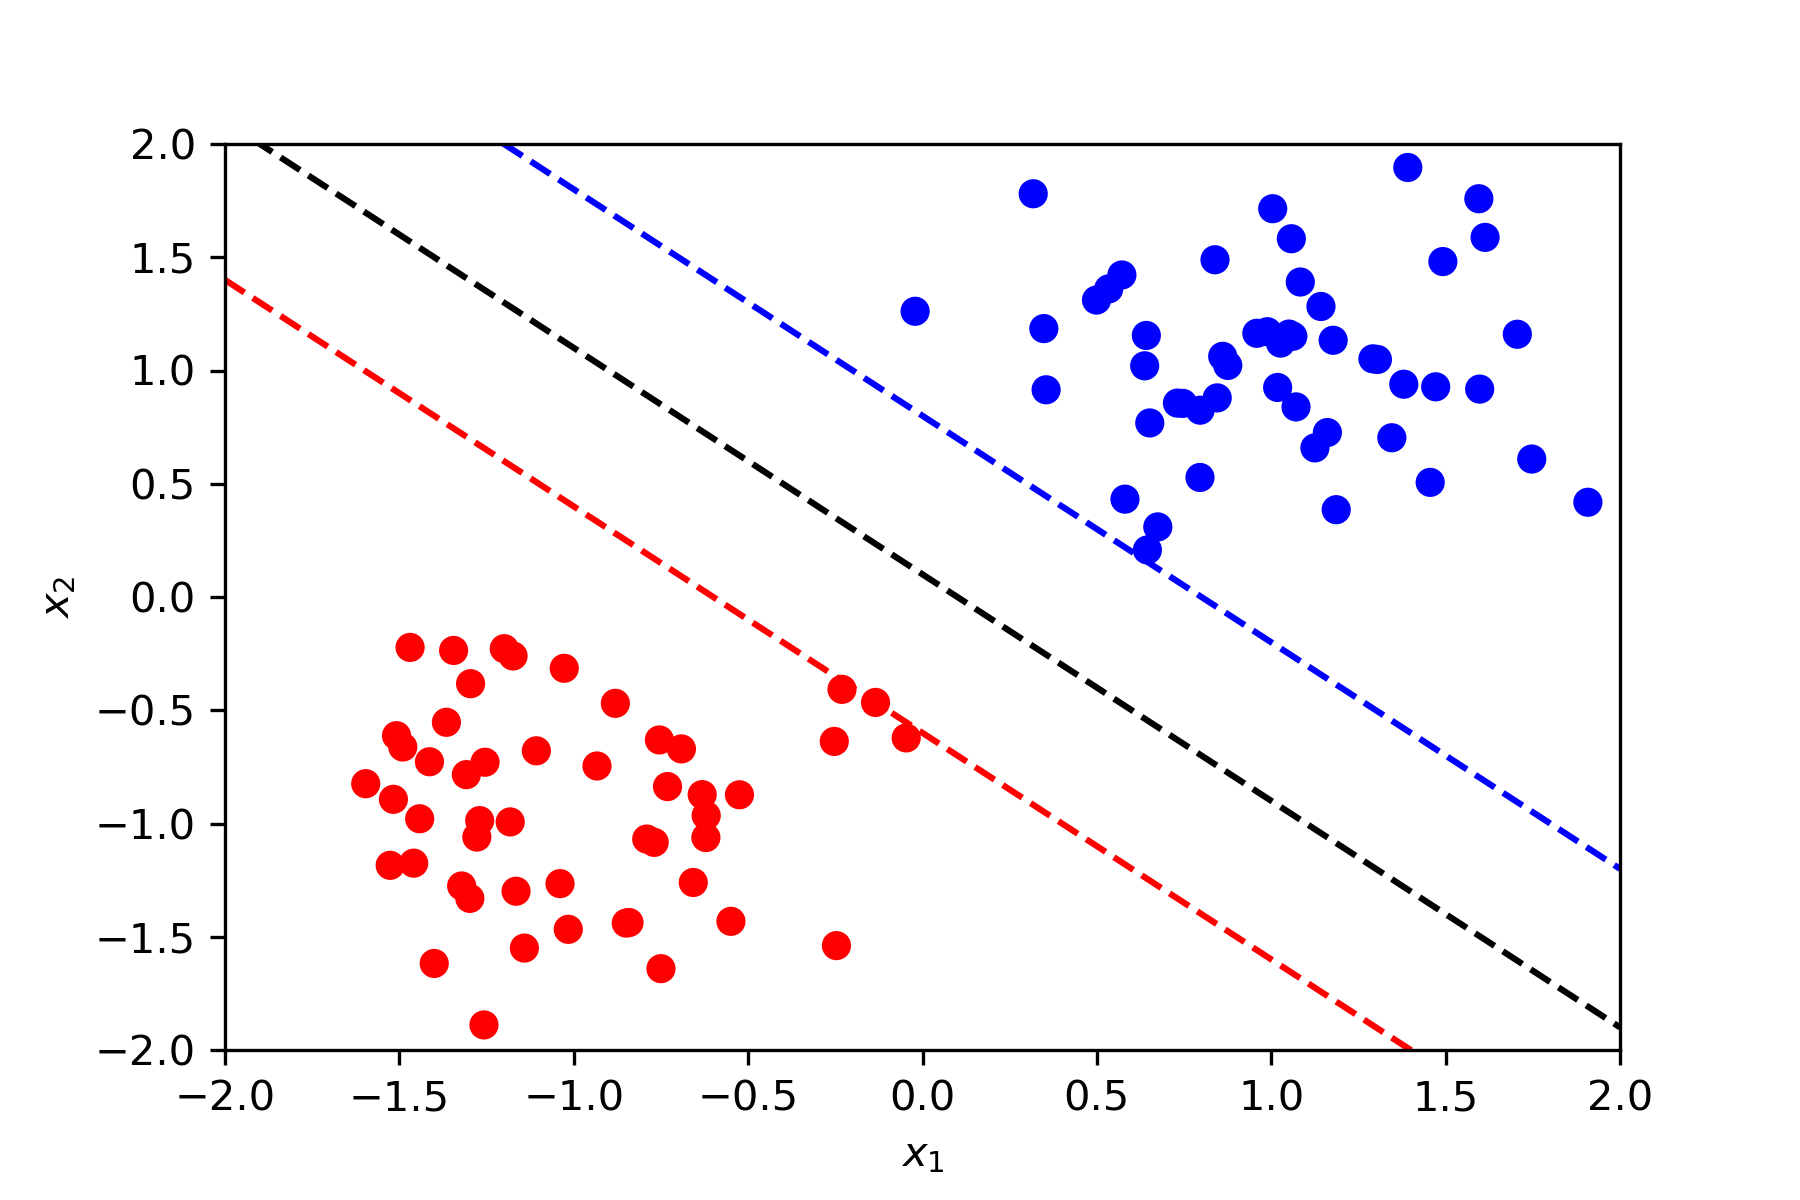

In [303]:
from IPython.display import Image
image_path = 'svm.png'
Image(filename=image_path)

**Soft Margin:**

Not all input features are linearly separable into two classes. The relaxation of the constraint that there be no margin violations will result into the soft-margin classifier. As before, we still look to create the largest possible margin but the model will incur a penalty for vectors that reside in the margin or are on the wrong side of the hyperplane.

We can construct a margin such that

$min_{\mathbf{w}, b, \boldsymbol{\zeta}} \frac{1}{2} \|\mathbf{w}\|_2^2 + C\sum_{i=1}^{n} \zeta_i$

with the constraints  

$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq (1 - \zeta_i), \quad \zeta_i \geq 0$

The degree of violations are controlled by the hyperparameter C and the magnitude of the penalty for each vector is proportional to the slack variable $\zeta_i$

SVM are an extension of support vector classifer. It enlarges the features space using kernels thereby accomdating non-linear boundaries between the classes. SVM uses kernal tick to mplicitly create features to project into higher dimensional space where the hyperplane divide the classes in the higher dimensional space.

**Kernal Trick**

Kernel is a function that creates the implicit mapping or projection to a higher dimensional space and is used to find relations in dataset. Kernal methods are named after kernal functions, which enable them to operate in a high-dimensional feature space. The Kernal computes the inner products rather than computing the coordinates of the data and this approach is popularly called as the kernal trick. The popular choices of kernels are

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Kernel Name} & \textbf{Kernel Argument} & \textbf{Keyword Argument} \\
\hline
\text{Linear Kernel} & \texttt{linear} & \mathbf{x}_i \cdot \mathbf{x}_j \\
\hline
\text{Polynomial} & \texttt{poly} & (r + \mathbf{x}_i \cdot \mathbf{x}_j)^d \\
\hline
\text{Gaussian RBF} & \texttt{rbf} & e^{-\gamma \| \mathbf{x}_i - \mathbf{x}_j \|^2} \\
\hline
\text{Sigmoid} & \texttt{sigmoid} & \tanh(\gamma \mathbf{x}_i \cdot \mathbf{x}_j + r) \\
\hline
\end{array}
$$

Using a hyperplane to separate the two classes will have limited performance as most problems require a non-linear decision boundary. We employ the kernal trick to overcome this limitation to engineer non-linear features using the original features. The advantage of using a kernel trick are

No direct feature generation that increases the size of the data set.
We can swap out and try different kernels to see which one performs the best.

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

# SVM
from sklearn.svm import SVC

# Lasso
from sklearn.linear_model import Lasso

# Metrics
from sklearn.metrics import  confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_auc_score, roc_curve, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

### Task

The aim of this project is to build a classification model using the Support Vector Machine (SVM) algorithm to predict the short-term trend of the Invesco QQQ Trust (QQQ) ETF. The focus is on identifying positive moves or upward trends in QQQ prices for the next day.

### Methodology

To achieve this objective, we will follow the following seven steps:

1. Data Acquisition: Get historical data for the Invesco QQQ Trust (QQQ) ETF, including relevant features such as price, volume, and other indicators.

2. Data Preparation & Analysis: Preprocess and clean the collected data to ensure its quality and suitability for training the SVM model. This step involves handling missing values, removing outliers, and performing feature engineering if necessary, tailored specifically to the QQQ dataset.

3. Model Selection: Choose the SVM algorithm as the classification model, considering its effectiveness in handling high-dimensional data and nonlinear relationships. Explore different SVM variations, such as linear, polynomial, or radial basis function (RBF), based on the characteristics of the QQQ dataset.

4. Model Training: Split the prepared QQQ data into training and testing sets. Train the SVM model on the training set, utilizing the historical data and their corresponding labels indicating upward or downward trends.

5. Model Evaluation: Evaluate the performance of the trained SVM model using suitable evaluation metrics such as accuracy, precision, recall, and F1-score. Analyze the results to assess the model's effectiveness in predicting positive moves accurately for the QQQ ETF.

6. Hyperparameter Tuning: Fine-tune the SVM model by optimizing its hyperparameters using techniques like grid search or randomized search. This step aims to enhance the model's performance and generalization ability by identifying the best combination of parameters specific to the QQQ dataset.

7. Prediction: Once the SVM model is trained and fine-tuned, apply it to make predictions on new or unseen QQQ data. Utilize the model to forecast the next-day trend of the QQQ ETF, identifying positive moves or upward trends with improved accuracy.

#### Data Acquisition

In [305]:
ticker = "QQQ"
# Set the start and end dates
start_date = "2015-01-01"
end_date = "2019-12-31"

# Download the daily data for the specified ticker and date range
QQQ = yf.download(ticker, start=start_date, end=end_date, interval='1d')
data=QQQ.copy()
data.to_csv('QQQ.csv')

[*********************100%***********************]  1 of 1 completed


#### Data Preparation & Analysis

In [306]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,103.760002,104.199997,102.440002,102.940002,95.704727,31314600
2015-01-05,102.489998,102.610001,101.139999,101.430000,94.300842,36521300
2015-01-06,101.580002,101.750000,99.620003,100.070000,93.036430,66205500
2015-01-07,100.730003,101.599998,100.489998,101.360001,94.235748,37577400
2015-01-08,102.220001,103.500000,102.110001,103.300003,96.039429,40212600


In [307]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,212.000000,212.149994,211.630005,211.809998,206.367126,23774700
2019-12-24,212.000000,212.089996,211.440002,211.919998,206.474304,7089000
2019-12-26,212.259995,213.809998,212.229996,213.789993,208.296265,17067500
2019-12-27,214.539993,214.559998,213.039993,213.610001,208.120911,18134100
2019-12-30,213.500000,213.630005,211.160004,212.210007,206.756882,21815500


In [308]:
data.shape

(1257, 6)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2015-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [310]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,143.166006,143.966317,142.254073,143.186006,136.725579,3.316658e+07
std,32.210276,32.377034,32.018802,32.213292,32.504645,1.831430e+07
min,94.230003,97.050003,84.739998,96.320000,90.456680,7.079300e+06
25%,110.820000,111.330002,110.150002,110.790001,104.075066,2.110780e+07
50%,141.190002,141.529999,140.570007,141.050003,134.493835,2.842610e+07
75%,172.279999,173.250000,170.929993,172.059998,165.795471,3.928120e+07
max,214.539993,214.559998,213.039993,213.789993,208.296265,1.508299e+08


In [311]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

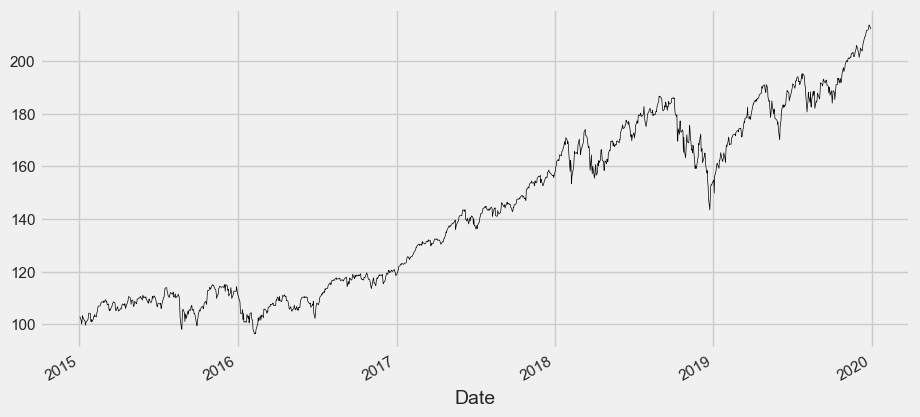

In [312]:
data['Close'].plot(figsize=(10, 5), linewidth=0.5, color='black')

#### Feature Extraction

I will create additional features for the QQQ ETF data.

Intraday Price Range (O-C, H-L): Calculate the difference between the opening and closing prices, as well as the difference between the highest and lowest prices of each day.

Sign of Return (Sign): Calculate the sign of the logarithmic return, which is the natural logarithm of the current day's closing price divided by the previous day's closing price. This captures the direction of the price movement.

Lagged Returns (rt-1, rt-2, ...): Include lagged returns by taking the returns from the previous days. For example, rt-1 represents the return one day ago, rt-2 represents the return two days ago, and so on. These lagged returns capture the historical performance of the ETF.

Momentum (Pt - Pt-k): Calculate the price change over a specific period, such as the difference between the current day's price and the price k periods ago. This measures the momentum or strength of the recent price movement.

Simple Moving Average (SMA): Compute the simple moving average, which is the average of the closing prices over a specified number of periods. This indicator smoothes out price fluctuations and provides a trend-following signal.

Exponential Moving Average (EMA): Calculate the exponential moving average, which assigns more weight to recent prices compared to older prices. This indicator is useful for capturing short-term trends and generating timely signals.

Relative Strength Index (RSI): The RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a market.

Volatility: The standard deviation of the returns over the specified number of periods.

In [313]:
def create_features(df):
    data = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    # Calculate basic price ranges and percentage changes
    data['O-C'] = data['Close'] / data['Open'] - 1
    data['H-L'] = data['High'] / data['Low'] - 1
    data['RET'] = np.log(data['Close'] / data['Close'].shift(1))
    data['Sign_Return'] = np.sign(data['RET'])
    # Calculate exponential moving average with a fixed span
    data['EMA'] = data['Close'].ewm(com=2/(len(data)+1)).mean()
    
    # Define window sizes for rolling calculations
    window_sizes = [2, 5, 7, 10, 15]
    
    for window in window_sizes:
        data['Return_lag_' + str(window)] = data['Close'].pct_change(window)
        data['Momentum_' + str(window)] = data['Close'] - data['Close'].shift(window)
        data['SMA_' + str(window)] = data['Close'].rolling(window).mean()
        data['EMA_' + str(window)] = data['Close'].ewm(span=window, adjust=False).mean()
        data['Volatility_' + str(window)] = data['RET'].rolling(window).std()
        data['RSI_' + str(window)] = compute_rsi(data['Close'], window)

    # Drop any rows with NaN values
    data.dropna(inplace=True)
    
    return data

def compute_rsi(series, window):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data = create_features(QQQ)
print(data.head())

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2015-01-26  104.139999  104.330002  103.610001  104.139999  96.820351   
2015-01-27  102.500000  102.559998  101.099998  101.440002  94.310143   
2015-01-28  103.070000  103.180000  100.900002  100.919998  93.826691   
2015-01-29  100.839996  102.080002   99.959999  101.889999  94.728539   
2015-01-30  101.800003  102.580002  100.959999  101.099998  93.994049   

              Volume       O-C       H-L       RET  Sign_Return  ...   SMA_10  \
Date                                                             ...            
2015-01-26  19960900  0.000000  0.006949 -0.001152         -1.0  ...  102.069   
2015-01-27  45253200 -0.010341  0.014441 -0.026269         -1.0  ...  102.058   
2015-01-28  43591700 -0.020860  0.022597 -0.005139         -1.0  ...  101.998   
2015-01-29  46539700  0.010413  0.021209  0.009566          1.0  ...  102.091   
20

In [314]:
data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
O-C              0
H-L              0
RET              0
Sign_Return      0
EMA              0
Return_lag_2     0
Momentum_2       0
SMA_2            0
EMA_2            0
Volatility_2     0
RSI_2            0
Return_lag_5     0
Momentum_5       0
SMA_5            0
EMA_5            0
Volatility_5     0
RSI_5            0
Return_lag_7     0
Momentum_7       0
SMA_7            0
EMA_7            0
Volatility_7     0
RSI_7            0
Return_lag_10    0
Momentum_10      0
SMA_10           0
EMA_10           0
Volatility_10    0
RSI_10           0
Return_lag_15    0
Momentum_15      0
SMA_15           0
EMA_15           0
Volatility_15    0
RSI_15           0
dtype: int64

#### Define Label

To predict the trend of a given asset, we define a label based on the asset's return over a specified period. The return is calculated as the percentage change in the closing price. We use a threshold criterion to categorize the returns into binary labels. For this example, we use a threshold of 0.3%

In [315]:
label_criterion = 0.002

data['Return'] = data['Close'].pct_change()
data['Label'] = 0

data.loc[data['Return'] > label_criterion, 'Label'] = 1
data.loc[data['Return'] <=label_criterion, 'Label'] = 0

data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,O-C,H-L,RET,Sign_Return,...,Volatility_10,RSI_10,Return_lag_15,Momentum_15,SMA_15,EMA_15,Volatility_15,RSI_15,Return,Label
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-27,102.500000,102.559998,101.099998,101.440002,94.310143,45253200,-0.010341,0.014441,-0.026269,-1.0,...,0.012729,49.410501,0.000099,0.010002,101.965334,102.377819,0.012866,50.031915,-0.025927,0
2015-01-28,103.070000,103.180000,100.900002,100.919998,93.826691,43591700,-0.020860,0.022597,-0.005139,-1.0,...,0.012829,46.945018,0.008494,0.849998,102.022001,102.195591,0.012413,52.865806,-0.005126,0
2015-01-29,100.839996,102.080002,99.959999,101.889999,94.728539,46539700,0.010413,0.021209,0.009566,1.0,...,0.013069,54.545455,0.005229,0.529999,102.057334,102.157392,0.012211,51.826321,0.009612,1
2015-01-30,101.800003,102.580002,100.959999,101.099998,93.994049,42927600,-0.006876,0.016046,-0.007784,-1.0,...,0.012538,57.466508,-0.021297,-2.200005,101.910667,102.025218,0.011211,41.766455,-0.007753,0
2015-02-02,101.330002,102.070000,99.750000,101.980003,94.812202,43624700,0.006415,0.023258,0.008667,1.0,...,0.012299,56.157123,-0.006237,-0.639999,101.868000,102.019566,0.011400,47.640122,0.008704,1


0    701
1    540
Name: Label, dtype: int64


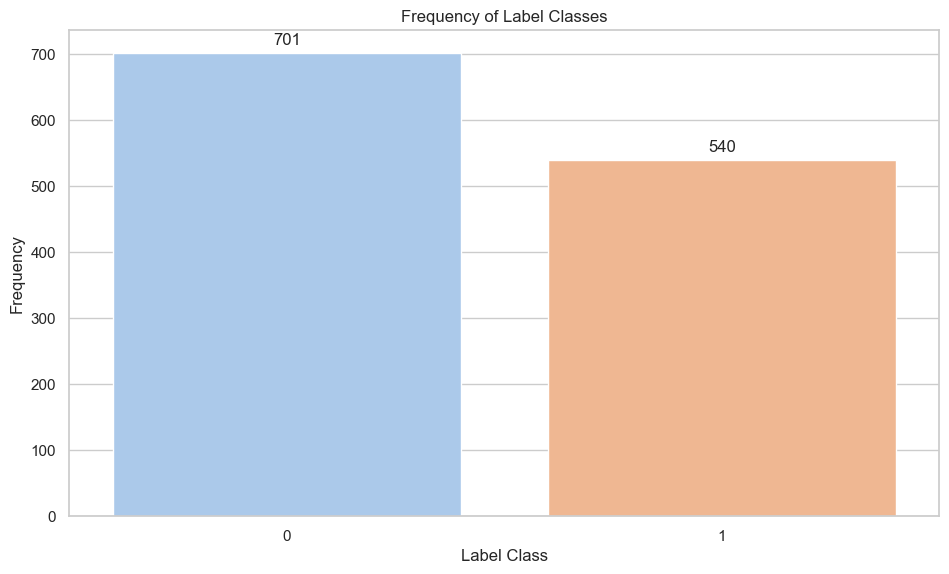

In [316]:
class_counts = data['Label'].value_counts()
print(class_counts)

# Use seaborn for a nicer plot style
sns.set(style="whitegrid")

# Create a color palette
colors = sns.color_palette("pastel")

# Plot the bar plot with custom colors
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors)

# Add labels to the plot
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.xlabel('Label Class')
plt.ylabel('Frequency')
plt.title('Frequency of Label Classes')
plt.xticks(rotation=0)
plt.show()

Class imbalance occurs when the number of instances in one class significantly outnumbers the instances in the other class. This can lead to biased model performance, where the classifier is more likely to predict the majority class. In our binary setup using SVM, we can address class imbalance by using techniques such as class weighting, where we assign a higher penalty to misclassifications of the minority class, or by resampling the dataset to balance the classes. SVM can handle this by setting the class_weight parameter to 'balanced', which automatically adjusts weights inversely proportional to class frequencies.

Splitting the data into training and testing sets is an essential step in machine learning. The training set is used to train the SVM model, and the testing set is used to evaluate its performance on unseen data

The training set will consist of 80% of the data, while the testing set will contain the remaining 20%. This approach allows us to train the model on a large portion of the data and assess its effectiveness on unseen data.

In [317]:
df_train, df_test, y_train, y_test = train_test_split(data, data['Label'], test_size=0.2, shuffle=False)

In [318]:
# Output the train and test data size
print(f"Train and Test Size {len(df_train)}, {len(df_test)}")

Train and Test Size 992, 249


In [319]:
df_train = df_train.drop(['Label', 'Close'], axis=1)
df_test = df_test.drop(['Label', 'Close'], axis=1)

## Model Development 

For the model selection, we will use Support Vector Machines (SVM) as our chosen algorithm. The SVM algorithm is known for its ability to handle high-dimensional data and nonlinear relationships.

To begin, we will use the standard hyperparameters for the SVM model. This will serve as our base model, which we will then evaluate for accuracy on the test data.

The SVM algorithm has various hyperparameters that can be tuned to improve performance. However, for our initial analysis, we will use the default settings to establish a baseline for comparison.

### Base Model

For the base model, we utilized Support Vector Machines (SVM) without any hyperparameter optimization.
By establishing this base model, we can later compare its performance to that of optimized models to gauge the effectiveness of hyperparameter tuning.

In [320]:
# Scale the feature variables using MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

# Create an SVM model
model = SVC()

# Fit the model to the scaled training data
model.fit(df_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(df_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-score: {:.3f}".format(f1))

Accuracy: 0.876
Precision: 0.902
Recall: 0.876
F1-score: 0.875


The results indicate that the SVM model performs well on the test data, with an accuracy and recall of 87.6%, and a slightly higher precision of 90.2%. The F1-score, which balances precision and recall, is 87.5%, suggesting that the model effectively identifies both positive and negative trends with a high level of accuracy and consistency.

#### Feature Selection Method- Embedded Method

Embedded methods incorporate feature selection within the model training process itself.

By employing Lasso regression for feature selection, we effectively reduced the dimensionality of the dataset while retaining the most relevant features for predicting the target variable.

In [321]:
# Create a Lasso model with regularization parameter alpha
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(df_train, y_train)

# Get the coefficients and select features with non-zero coefficients
selected_mask = lasso.coef_ != 0
selected_features = df_train.columns[selected_mask]

# Subset the original data using the selected features
X_train_filtered = df_train[selected_features]
X_test_filtered = df_test[selected_features]

In [322]:
selected_features

Index(['Open', 'High', 'Adj Close', 'Volume', 'Sign_Return', 'EMA',
       'Momentum_2', 'SMA_2', 'EMA_2', 'RSI_2', 'Momentum_5', 'Momentum_7',
       'SMA_7', 'RSI_7', 'Momentum_10', 'SMA_10', 'RSI_10', 'Momentum_15',
       'SMA_15', 'RSI_15'],
      dtype='object')

### Hyperparameter Tuning

Hyperparameter tuning with GridSearchCV and TimeSeriesSplit is an essential step in optimizing machine learning models for time series data. By systematically searching through the hyperparameter space and validating on temporally ordered data, we can identify the best hyperparameters that lead to improved model performance


For each hyperparameter combination
    
   Train the model $h_{\lambda}$ on k-1 folds of training data
    
   Validate the model on the remaining fold to compute the validation error $\mathcal{L}_{\text{cv}}(h_{\lambda})$

The average validation error across all folds is given by:

$\mathcal{L}_{\text{cv}}(h_{\lambda}) = \frac{1}{k} \sum_{i=1}^{k} \mathcal{L}_{\text{val}}^{(i)}(h_{\lambda})$

The optimal hyperparameters are obtained by minimizing the cross-validation error:

$\lambda^* = \arg \min_{\lambda \in \Lambda} \mathcal{L}_{\text{cv}}(h_{\lambda})$

In [323]:
# Split the data into smaller pieces using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2, gap=1)

# Define the reduced feature set obtained from the embedded method
X_train_reduced = X_train_filtered
X_test_reduced = X_test_filtered

y_reduced_train = y_train
y_reduced_test = y_test


# Scale the feature variables using MinMaxScaler
scaler = MinMaxScaler()
X_reduced_train = scaler.fit_transform(X_train_reduced)
X_reduced_test = scaler.transform(X_test_reduced)

# Create an SVM model
model = SVC()

# Define the reduced parameter grid for hyperparameter tuning
param_grid = {
    "C": [0.1, 1],
    "kernel": ["linear", "rbf"],
    "gamma": [0.01, 0.1]
}

# Perform GridSearchCV with TimeSeriesSplit
gs = GridSearchCV(model, param_grid,cv=tscv, refit=True,verbose=3)
gs.fit(X_reduced_train, y_reduced_train)

# Get the best estimator, best parameters, and best score
best_estimator = gs.best_estimator_
best_params = gs.best_params_
best_score = gs.best_score_

# Print the best estimator, best parameters, and best score
print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/2] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.888 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.564 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.888 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/2] END ....C=1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/2] END ....C=1, gamma=0.01, kernel=linear;, score=0.888 total time=   0.0s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.836 total time=   0.0s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;,

The hyperparameter tuning process for the SVM model identified the best estimator as SVC(C=0.1, gamma=0.1, kernel='rbf'). The best parameters found were a regularization parameter C of 0.1, a gamma of 0.1, and a gaussian kernel. This model achieved a best cross-validation score of approximately 86.2%, indicating that the tuned model improves the prediction performance compared to the baseline model

In [324]:
# Fit the models to the training data
# Instantiate a new model using the optimized parameters
model_opt = SVC(kernel=best_params['kernel'],
                gamma=best_params['gamma'],
                C=best_params['C'])
model_opt.fit(X_reduced_train, y_reduced_train)

SVC(C=0.1, gamma=0.1)

In [325]:
# Predicting the test dataset
y_pred = model_opt.predict(X_reduced_test)

In [326]:
# Measure accuracy
print(f'Train Score: {model_opt.score(X_reduced_train, y_reduced_train)}')
print(f'Test Score: {model_opt.score(X_reduced_test, y_reduced_test)}')

Train Score: 0.873991935483871
Test Score: 0.8755020080321285


### Prediction Quality Analysis

The confusion matrix is a useful tool for evaluating the performance of a classification model. It provides a summary of the model's predictions compared to the actual values. The confusion matrix consists of four components: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). These components can be used to calculate metrics such as precision and recall.

$$\begin{array}{c|cc}
    & \text{Predicted Positive} & \text{Predicted Negative} \\
    \hline
    \text{Actual Positive} & \text{TP} & \text{FN} \\
    \text{Actual Negative} & \text{FP} & \text{TN} \\
\end{array}$$

Precision is a measure of the model's accuracy in identifying positive results. It is calculated as the ratio of true positives to the sum of true positives and false positives. Precision indicates the proportion of positive identifications that were actually correct.

Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive samples. It is calculated as the ratio of true positives to the sum of true positives and false negatives. Recall represents the proportion of actual positive samples that were correctly identified.

In [327]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 102
False Positives: 31
False Negatives: 0
True Positives: 116


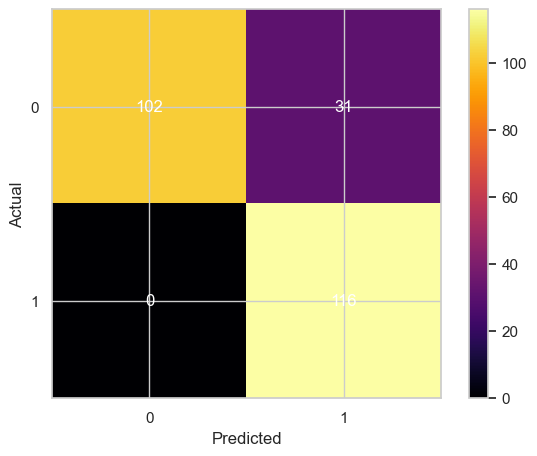

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       133
           1       0.79      1.00      0.88       116

    accuracy                           0.88       249
   macro avg       0.89      0.88      0.88       249
weighted avg       0.90      0.88      0.87       249



In [328]:
classes=['0','1']
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='inferno')

# Set labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Display values in the matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha='center', va='center', color='white')

plt.show()

# Classification report
print(classification_report(y_test, y_pred))


#### Receiver Operating Curve 

The ROC curve is a graphical representation that illustrates the performance of a binary classifier system across various discrimination thresholds. It plots the true positive rate (TPR), also known as sensitivity or recall, against the false positive rate (FPR) as the threshold for classifying positive and negative samples is adjusted.

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

The true positive rate is the proportion of actual positive samples that are correctly identified as positive by the classifier. It measures the classifier's ability to correctly detect positive instances.

The false positive rate is the proportion of actual negative samples that are incorrectly classified as positive by the classifier. It represents the rate of false alarms or false positives.

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

By plotting the TPR against the FPR at different threshold settings, the ROC curve provides a visual assessment of the classifier's performance in terms of its trade-off between sensitivity and specificity. A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in an ROC curve that hugs the top-left corner of the plot.

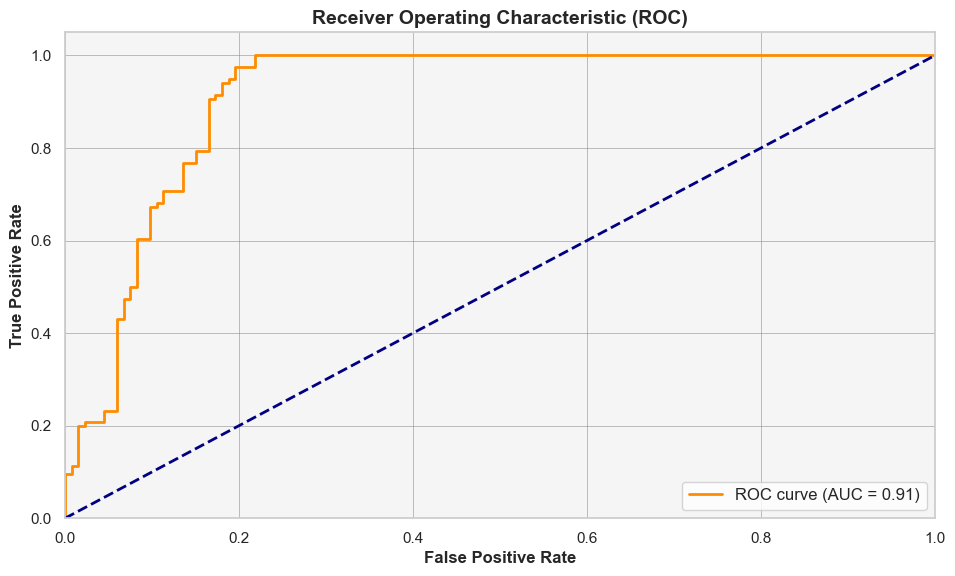

In [329]:
# Calculate ROC Curve and AUC
y_scores = model_opt.decision_function(X_reduced_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding grid lines
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# Adding labels and title with font styles
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14, fontweight='bold')

# Adding legend
plt.legend(loc="lower right", fontsize=12)
# Adding background color
plt.gca().set_facecolor('#f5f5f5')
# Show plot
plt.show()

## Conclusion

The optimized SVM model demonstrated a satisfactory performance in predicting positive price movements for the selected ticker. The model's ability to capture the nuances of price changes through engineered features and appropriate tuning of hyperparameters was reflected in the evaluation metrics, including a high AUC score, indicating a strong predictive capability.

Predicting short-term asset returns is inherently challenging due to the efficient market hypothesis, which suggests that asset prices reflect all available information. However, by carefully selecting and engineering features, and employing robust machine learning techniques like SVM with hyperparameter tuning, it is possible to build models that can effectively capture and predict trends, albeit with some degree of uncertainty.

# References

1. SVR & KNN for stock prediction
2. Intro to Machine Learning using Scikit-learn
3. CQF Module 4 Lecture 4